In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('feature-engineering.csv')
df.head()

,Gender_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,PriorDefault_t,Employed_t,DriversLicense_t,Citizen_p,Citizen_s,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,CreditScore,Income,Approved
0,1,0,1,0,1,0,0,1,1,0,0,0,30.83,0.000,0.515625,0.423559,1.25,1,321.692754,1
1,0,0,1,0,1,0,0,1,1,0,0,0,58.67,4.460,0.653846,0.630435,3.04,6,560.000000,1
2,0,0,1,0,1,0,0,1,0,0,0,0,24.50,0.500,0.653846,0.630435,1.50,0,824.000000,1
3,1,0,1,0,1,0,0,1,1,1,0,0,27.83,1.540,0.515625,0.423559,3.75,5,3.000000,1
4,1,0,1,0,1,0,0,1,0,0,0,1,20.17,5.625,0.515625,0.423559,1.71,0,321.692754,1


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.shape

(690, 20)

In [4]:
X=df.iloc[:,:-1]
y=df['Approved']

In [5]:
type(df.iloc[:,:-1].values)

numpy.ndarray

In [6]:
X.head()

,Gender_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,PriorDefault_t,Employed_t,DriversLicense_t,Citizen_p,Citizen_s,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,CreditScore,Income
0,1,0,1,0,1,0,0,1,1,0,0,0,30.83,0.000,0.515625,0.423559,1.25,1,321.692754
1,0,0,1,0,1,0,0,1,1,0,0,0,58.67,4.460,0.653846,0.630435,3.04,6,560.000000
2,0,0,1,0,1,0,0,1,0,0,0,0,24.50,0.500,0.653846,0.630435,1.50,0,824.000000
3,1,0,1,0,1,0,0,1,1,1,0,0,27.83,1.540,0.515625,0.423559,3.75,5,3.000000
4,1,0,1,0,1,0,0,1,0,0,0,1,20.17,5.625,0.515625,0.423559,1.71,0,321.692754


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Approved, dtype: int64

# Univariate Selection


In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=15)
ordered_feature=ordered_rank_features.fit(X,y)

In [10]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [11]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [12]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Gender_b,0.175810
1,Married_l,2.495114
2,Married_u,4.908390
3,Married_y,18.817889
4,BankCustomer_g,4.908390
5,BankCustomer_gg,2.495114
6,BankCustomer_p,18.817889
7,PriorDefault_t,170.746388
8,Employed_t,82.965844
9,DriversLicense_t,0.374048


In [13]:
features_rank.nlargest(10,'Score')

,Features,Score
18,Income,52889.349868
17,CreditScore,953.509360
16,YearsEmployed,279.917341
7,PriorDefault_t,170.746388
13,Debt,151.975087
8,Employed_t,82.965844
12,Age,79.945268
3,Married_y,18.817889
6,BankCustomer_p,18.817889
14,EducationLevel,7.777372


# Feature Importance


In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [15]:
print(model.feature_importances_)

[0.01796896 0.00223785 0.00678839 0.00625776 0.00557448 0.00267097
 0.00763106 0.35663928 0.07549839 0.02085268 0.00599864 0.01473194
 0.06499268 0.06829546 0.08091447 0.04091068 0.07608249 0.07574094
 0.07021291]


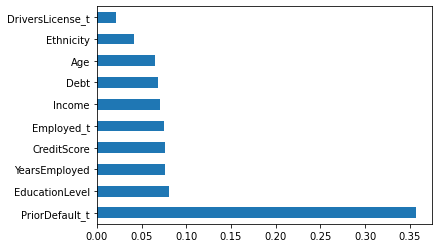

PriorDefault_t    0.356639
EducationLevel    0.080914
YearsEmployed     0.076082
CreditScore       0.075741
Employed_t        0.075498
Income            0.070213
dtype: float64


In [16]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
lst=ranked_features.nlargest(10).plot(kind='barh')
plt.show()
lst=ranked_features.nlargest(6)
print(lst)

# Multicollinearity
- variance inflation factor
- correlation

## variance inflation factor

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
#let's check the values
vif

,VIF Factor,features
0,3.412023,Gender_b
1,inf,Married_l
2,inf,Married_u
3,inf,Married_y
4,inf,BankCustomer_g
5,inf,BankCustomer_gg
6,inf,BankCustomer_p
7,3.360099,PriorDefault_t
8,3.853341,Employed_t
9,1.952504,DriversLicense_t


#### Age, EducationLevel, Married, BankCustomer, Ethnicity has >5.0 Vif

# correlation

<AxesSubplot:>

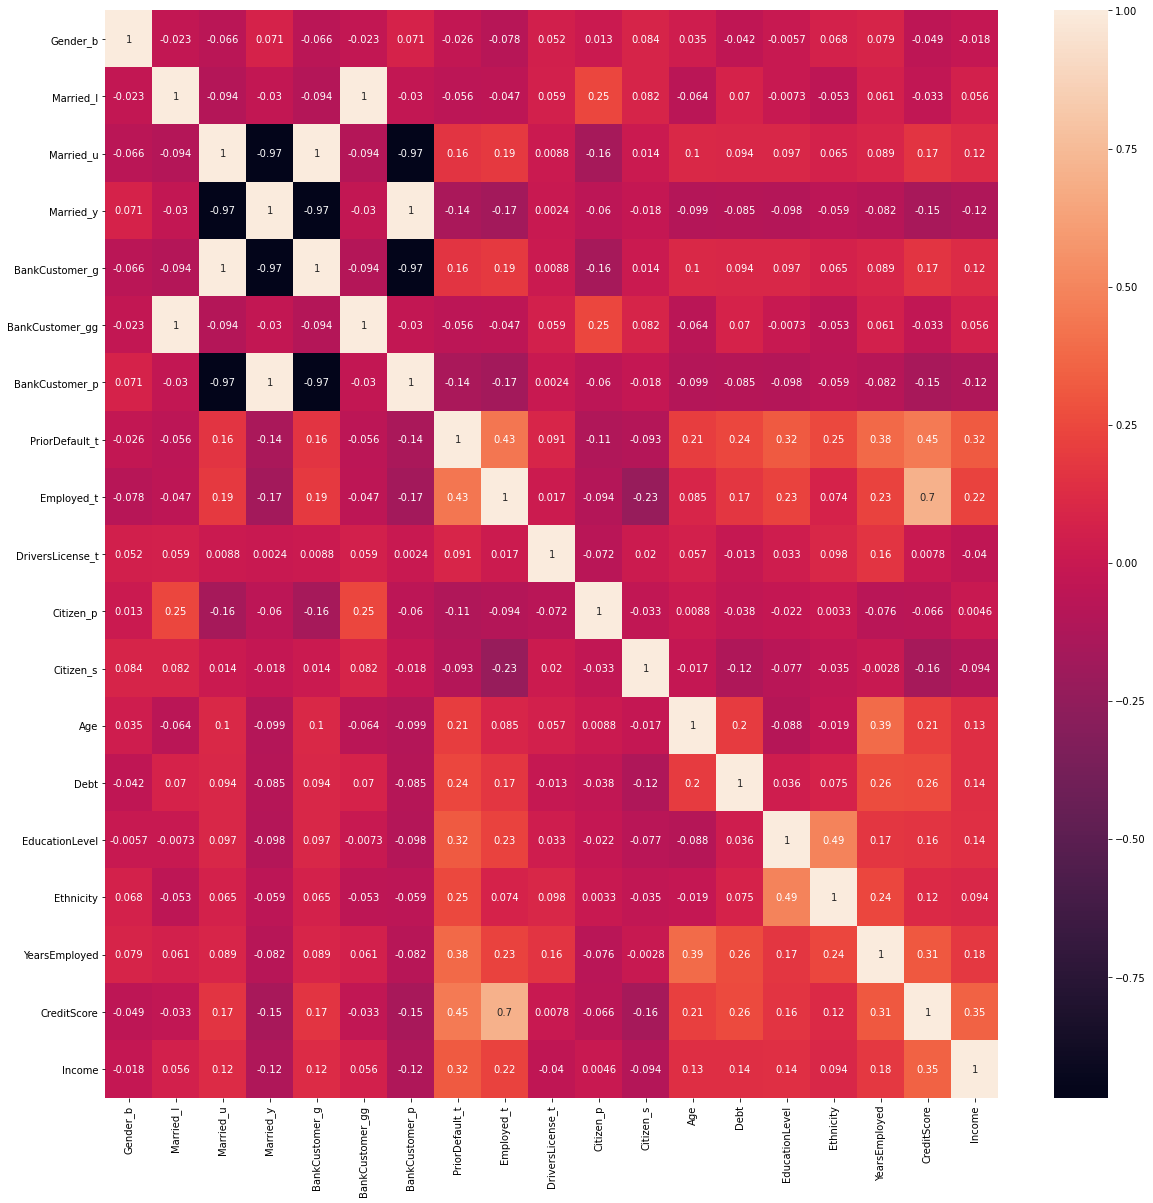

In [18]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [19]:
threshold=0.5

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
correlation(X,threshold)

{'BankCustomer_g',
 'BankCustomer_gg',
 'BankCustomer_p',
 'CreditScore',
 'Married_y'}

# Information Gain


In [22]:
from sklearn.feature_selection import mutual_info_classif

In [23]:
mutual_info=mutual_info_classif(X,y)

In [24]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

PriorDefault_t      0.297249
CreditScore         0.167713
Employed_t          0.108918
Income              0.083886
EducationLevel      0.077240
YearsEmployed       0.073430
Ethnicity           0.051324
Married_u           0.029247
BankCustomer_gg     0.022781
Citizen_p           0.020874
BankCustomer_p      0.020765
Debt                0.017180
Married_y           0.012308
Age                 0.007701
Gender_b            0.000000
Citizen_s           0.000000
Married_l           0.000000
BankCustomer_g      0.000000
DriversLicense_t    0.000000
dtype: float64

In [25]:
## Not including Employed because Income is same as Employed
df = df[['PriorDefault_t','YearsEmployed','CreditScore','Income','Approved']]
df.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income,Approved
0,1,1.25,1,321.692754,1
1,1,3.04,6,560.000000,1
2,1,1.50,0,824.000000,1
3,1,3.75,5,3.000000,1
4,1,1.71,0,321.692754,1


In [26]:
df.to_csv('feature_selection.csv',index=False)